In [1]:
import numpy as np
import h5py
import netCDF4 as nc
import oceanDAS as odas
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, datetime, timezone
from scipy import signal
import xarray as xr

%matplotlib inline
%cd -q '/Users/hglover/Library/CloudStorage/Box-Box/FiberExperiments/DAScomparison_paper/'

plt.rc('font', size=12)


In [2]:
# # Marthas Vineyard

# pname = 'MarthasVineyard_Smith/'
# das = nc.Dataset(pname+'mvco_2022-12_waveoutputs_nch2112.nc')
# t1 = datetime(2022, 12, 21, 21, 0, 0,tzinfo=timezone.utc).timestamp()
# dt = 30*60
# time_mv = np.arange(t1,t1+(dt*len(das['time'])),dt)
# chn = das['channels'][:]
# frq_p2 = das['frequency'][:]
# ns = len(time_mv)

# adcp = nc.Dataset(pname+'mvco_adcp_202211_allwaveoutputs.nc')
# t1 = datetime(2022, 12, 5, 15, 0, 0,tzinfo=timezone.utc).timestamp()
# dt = 15*60
# time_adcp = np.arange(t1,t1+(dt*len(adcp['time'])),dt)

# psd_p = np.empty([ns,len(frq_p2)])
# psd_d = np.empty([ns,len(frq_p2)])
# psd_dp = np.empty([ns,len(frq_p2)])
# for jj in range(ns):
#     temp = adcp['E'][time_adcp==time_mv[jj],:].flatten()
#     psd_p[jj,:] = np.interp(frq_p2,adcp['frequency'][:],temp)
#     psd_d[jj,:] = das['E'][jj ,chn==2100,:].flatten()
#     psd_dp[jj,:] = das['E_corr'][jj ,chn==2100,:].flatten()

# nrmse2 = calc_nrmse(psd_p,psd_dp)

# # plot example with close calibration point
# t_idx = 95
# jj=2
# ax[jj].plot(frq_p2,psd_d[t_idx,:],'b',linewidth=2)
# ax[jj].fill_between(frq_p2,psd_d[t_idx,:]*ci95[0], psd_d[t_idx,:]*ci95[1],alpha=0.3, facecolor='b')

# ax2 = ax[jj].twinx()
# ax2.fill_between(frq_p2,psd_dp[t_idx,:]*ci95[0], psd_dp[t_idx,:]*ci95[1],alpha=0.3, facecolor='tab:gray')
# ax2.fill_between(frq_p2,psd_p[t_idx,:]*ci95[0], psd_p[t_idx,:]*ci95[1],alpha=0.3, facecolor='k')
# ax2.plot(frq_p2,psd_dp[t_idx,:],c = 'tab:gray',linewidth=2,linestyle='--')
# ax2.plot(frq_p2,psd_p[t_idx,:],c = 'k',linewidth=2.5)
# ax2.set_ylim([1e-4,50])
# # # ax[jj].set_ylim([3e-14,3e-10])
# ax2.set_yscale('log')
# ax2.set_ylabel('PSD ($m^2$/Hz)')


In [3]:
# plot calculated wave chars for MV
pname = 'MarthasVineyard_Smith/'
d = xr.open_dataset(pname+'mvco_2022-12_waveoutputs_nch2112.nc')
d

<xarray.Dataset>
Dimensions:    (channels: 912, time: 385, frequency: 129)
Coordinates:
  * time       (time) datetime64[ns] 2022-12-21T21:00:00 ... 2022-12-29T23:30:00
  * channels   (channels) int32 1200 1201 1202 1203 1204 ... 2108 2109 2110 2111
  * frequency  (frequency) float64 0.0 0.007812 0.01562 ... 0.9844 0.9922 1.0
Data variables:
    Hs         (channels, time) float64 ...
    Tp         (channels, time) float64 ...
    Te         (channels, time) float64 ...
    E          (time, channels, frequency) float64 ...
    E_corr     (time, channels, frequency) float64 ...

In [4]:
# plot calculated wave chars for MV
d = xr.open_dataset(pname+'mvco_adcp_202211_allwaveoutputs.nc')
d


<xarray.Dataset>
Dimensions:    (time: 3401, frequency: 129)
Coordinates:
  * time       (time) datetime64[ns] 2022-12-05T15:00:00 ... 2023-01-11T07:45:00
  * frequency  (frequency) float64 0.0 0.01562 0.03125 ... 1.969 1.984 2.0
Data variables:
    Hs         (time) float64 ...
    Tp         (time) float64 ...
    Te         (time) float64 ...
    E          (time, frequency) float32 ...

In [5]:
# plot calculated wave chars for MV
pname = 'MarthasVineyard_Smith/'
d = nc.Dataset(pname+'mvco_2022-12_waveoutputs_nch2112.nc')
print(d)

# t1 = datetime(2022, 12, 21, 10, 0, 0,tzinfo=timezone.utc).timestamp()
t1 = datetime(2022, 12, 21, 6, 0, 0,tzinfo=timezone.utc).timestamp()
dt = 30*60
time_mv = np.arange(t1,t1+(dt*len(d['time'])),dt)
plottime = mdates.date2num(time_mv*1e+6)
# calculated every 30 minutes
chn = d['channels'][:]
cc = 1696
hs_mv = d['Hs'][chn==cc,:].flatten() #1696
tp_mv = d['Tp'][chn==cc,:].flatten()
te_mv = d['Te'][chn==cc,:].flatten()
xdist = chn*4

adcp = nc.Dataset(pname+'mvco_adcp_202211_allwaveoutputs.nc')

t1 = datetime(2022, 12, 5, 15, 0, 0,tzinfo=timezone.utc).timestamp()
dt = 15*60
time_adcp = np.arange(t1,t1+(dt*len(adcp['time'])),dt)
plttime_adcp = mdates.date2num(time_adcp*1e+6)
hs_adcp = adcp['Hs'][:]
tp_adcp = adcp['Tp'][:]
te_adcp = adcp['Te'][:]
# hs_adcp = np.interp(time_mv,time_adcp,hs_adcp)
# tp_adcp = np.interp(time_mv,time_adcp,tp_adcp)
# te_adcp = np.interp(time_mv,time_adcp,te_adcp)




<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): channels(912), time(385), frequency(129)
    variables(dimensions): float64 Hs(channels, time), int64 time(time), int32 channels(channels), float64 frequency(frequency), float64 Tp(channels, time), float64 Te(channels, time), float64 E(time, channels, frequency), float64 E_corr(time, channels, frequency)
    groups: 


(19346.0, 19354.0)

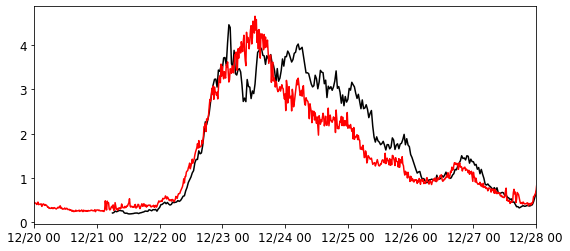

In [6]:
xmin = mdates.datestr2num('2022-12-20')
xmax = mdates.datestr2num('2022-12-28')
fig,ax = plt.subplots(1,1,figsize=(9,4))
ax.plot(plottime,hs_mv,'k')
ax.plot(plttime_adcp,hs_adcp,'r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H'))
ax.set_xlim([xmin,xmax])


2022-12-25 10:00:00


(4800.0, 6760.0)

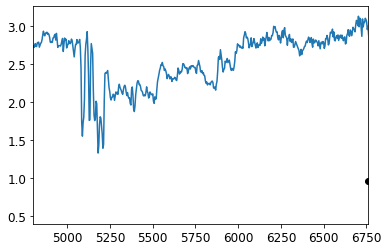

In [7]:
idx = 200
print(datetime.utcfromtimestamp(time_mv[idx]))
hs_x = d['Hs'][:,idx].flatten()

plt.figure()
plt.plot(xdist,hs_x)
plt.plot(1690*4,hs_adcp[idx],'ko')
plt.xlim([1200*4,1690*4])